# Effect of a Single TMP on Pulsation Ratio
In this notebook, we explore the impact of changing a single TMP(While keeping the rest fixed) on pulsation ratio (Both interpolated and non-interpolated). 

In [14]:
from typing import Any, Dict, List, Tuple
from matplotlib.figure import Figure    
import pandas as pd
import matplotlib.pyplot as plt

# Function : plot_data with a single column changing and everthing else stays fixed
default_dict = {        # Contains the default values for the 5 TMPs
    "Maternal Wall Thickness": 4,
    "Maternal Hb Concentration": 12.0,
    "Maternal Saturation": 1.0,
    "Fetal Hb Concentration 2": 12.0,       # 1 has weired values
    "Fetal Saturation": 0.6,
}


def plot_single_tmp_change(data: pd.DataFrame, y_column: str, x_axes: List[str], default_dict: Dict[str, Any] = default_dict, fig_size: Tuple[float, float] = (12, 6)) -> Figure:
    """
    Plots the changes in the y_column of data with respect to the columns defined in x_axes.
    
    The original goal of this function is to visualize how Pulsation Ratio(Or any other measure) changes with respect to
    SDD.
    
    :param data: The dataframe containing the data
    :param y_column: The column to be plotted along y-axis
    :param x_axes: The columns to be used as the x-axis
    :param default_dict: The default values for the fixed columns (for the rest of the columns)
    :return: The figure object containing the plot
    
    Note: This function only plots the very first row if there are multiple rows with the same values in default_dict.
    """
    # Sanity Check
    assert all([column_name in data.columns for column_name in default_dict.keys()]), "Unknown column(s) in default_dict"
    assert all([column_name in data.columns for column_name in x_axes]), "Unknown column(s) in x_axes"
    assert y_column in data.columns, "Unknown column as y_column"
    
    # Filter Step
    filtered_dict_without_y = {key: default_dict[key] for key in default_dict if key != y_column}
    filtered_data = data.copy()
    for key, value in filtered_dict_without_y.items():
        filtered_data = filtered_data[filtered_data[key] == value]
        if filtered_data.shape[0] == 0:
            raise ValueError(f"Filtering Breaks for {key} = {value}")
    
    # Plotting Step
    fig = plt.figure(figsize = fig_size)
    unique_y_values = filtered_data[y_column].unique()
    unique_y_values.sort()
    for y_value in unique_y_values:
        temp_data = filtered_data[filtered_data[y_column] == y_value][x_axes].to_numpy()
        plt.plot(temp_data[0, :], label=f"{y_value}")
    # Draw the legend to the right of the entire plot, outside of the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylabel(y_column)
    plt.xlabel("X Axis")
    return fig


In [15]:
# Load in pre-saved data
from pathlib import Path
import json

# Load the log intensity data
pr_data_path = Path().resolve().parent.parent / "data" / "processed_data" / "pulsation_ratio.pkl"
pr_data = pd.read_pickle(pr_data_path)
pr_config_path = pr_data_path.with_suffix('.json')
with open(pr_config_path, 'r') as file:
    pr_config = json.load(file)
pr_columns = pr_config['features']

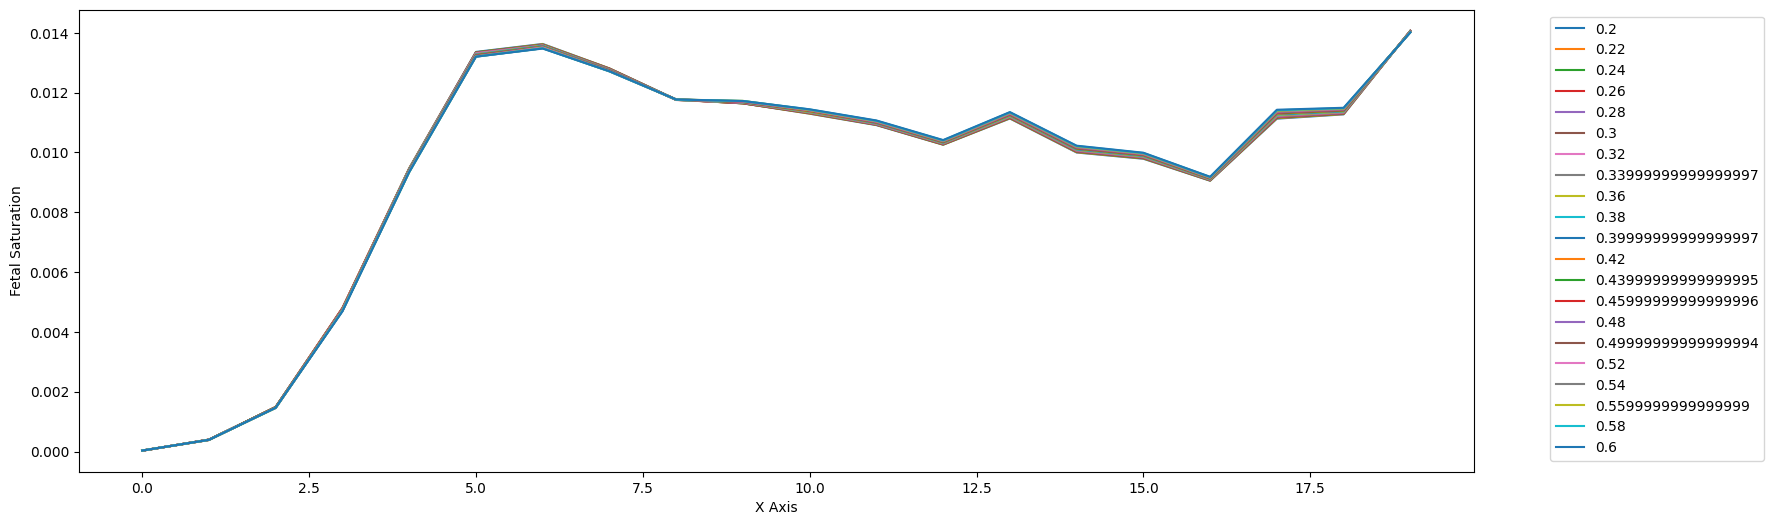

In [16]:
plot_single_tmp_change(pr_data, "Fetal Saturation", pr_columns[:len(pr_columns) // 2], default_dict, (18, 6))
plt.show()